In [1]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

from qiskit.visualization import plot_histogram

# 2 Qubit Gates

In [2]:
n = 2
qc = QuantumCircuit(3,2)

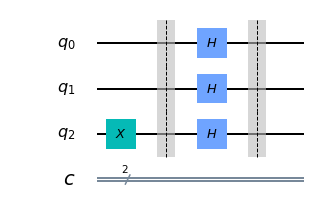

In [3]:
#initialization
qc.x(2)
qc.barrier()
for qubit in range(3):
    qc.h(qubit)

qc.barrier()
qc.draw(output = 'mpl')    

In [4]:
#to create a two control one target gate U
def ccU(qc,theta,c1,c2,t):
    qc.cu1(theta/2,c2,t)
    qc.cx(c1,c2)
    qc.cu1(-theta/2,c2,t)
    qc.cx(c1,c2)
    qc.cu1(theta/2,c1,t) 

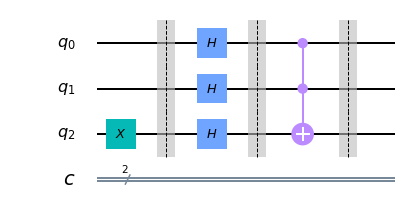

In [5]:
def oracle(qc,n):
    if(n==0):
        qc.x(0)
        qc.x(1)
        #ccU(qc,90,0,1,2)
        qc.ccx(0,1,2)
        qc.x(0)
        qc.x(1)
        
    if(n==1):
        qc.x(0)
        #ccU(qc,90,0,1,2)
        qc.ccx(0,1,2)
        qc.x(0)
        
    if(n==2):
        qc.x(1)
        #ccU(qc,90,0,1,2)
        qc.ccx(0,1,2)
        qc.x(1)
        
    if(n==3):
        #ccU(qc,90,0,1,2)
        qc.ccx(0,1,2)
    qc.barrier()
    
oracle(qc,3)
qc.draw(output='mpl')

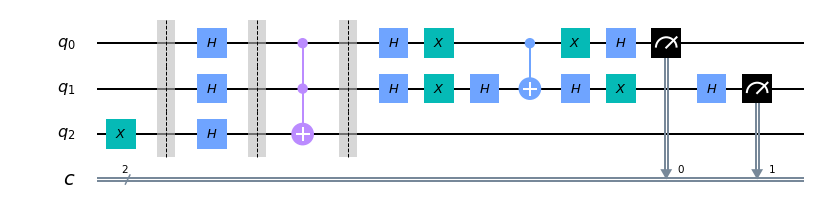

In [6]:
#Grover Operator
qc.h(0)
qc.h(1)
qc.x(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.x(1)
qc.x(0)
qc.h(0)
qc.h(1)

qc.measure(0,0)
qc.measure(1,1)

qc.draw(output='mpl')

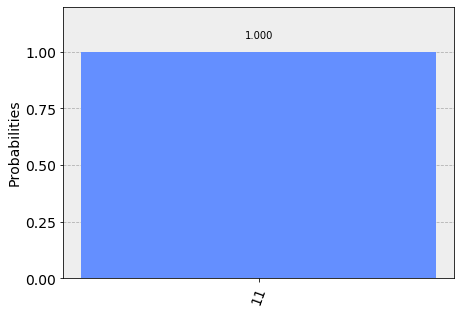

In [7]:
#simulation

backend_sim = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend_sim, shots=1024).result()
plot_histogram(results.get_counts())